In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/owid-covid-data.csv')

# Check the first few rows of the dataset to understand its structure
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
num_rows = df.shape[0]
print(num_rows)
# 50,370 rows

50370


In [ ]:
# Check for missing values
df.isnull().sum()

# Overview of the columns and data types
df.info()

# For this EDA, you may need to ensure that columns like 'Country', 'GDP', 'COVID_deaths', 'Democracy_score', 'Date' are present
# If necessary, rename columns to match the expected format
df.columns = df.columns.str.strip()  # Strip whitespace from column names


<class 'pandas.core.frame.DataFrame'>
Index: 50370 entries, 0 to 52094
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Country                   50370 non-null  object        
 1   Year                      50370 non-null  int64         
 2   Date                      50370 non-null  datetime64[ns]
 3   Deaths                    50370 non-null  int64         
 4   GDP_per_Capita            50370 non-null  float64       
 5   Democracy_Scores          50370 non-null  float64       
 6   Democracy_Classification  50370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.1+ MB


In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
df['Date'].dtype


dtype('<M8[ns]')

In [ ]:
# Check missing data
df.isnull().sum()

# Handle missing values - we can drop rows with missing values for simplicity or fill them with the mean
df = df.dropna(subset=['GDP_per_Capita', 'Democracy_Scores'])


In [ ]:
# Group by 'Country' and sum the COVID deaths
country_deaths = df.groupby('Country')['Deaths'].sum()

# Top 10 countries with the most COVID deaths
most_deaths_top_10 = country_deaths.sort_values(ascending=False).head(10)

# Top 10 countries with the least COVID deaths but greater than 1
least_deaths_top_10 = country_deaths[country_deaths > 1].sort_values(ascending=True).head(10)

# Display results
print("Top 10 countries with the most COVID-19 deaths:\n", most_deaths_top_10)
print("\nTop 10 countries with the least COVID-19 deaths (greater than 1):\n", least_deaths_top_10)



Top 10 countries with the most COVID-19 deaths:
 Country
Brazil            27108921
India             17171598
Peru              15276634
Mexico            15017707
United Kingdom    11467694
Italy             10582442
France             9284524
Spain              8720097
Colombia           4585410
Argentina          3802826
Name: Deaths, dtype: int64

Top 10 countries with the least COVID-19 deaths (greater than 1):
 Country
Mongolia                    3
Burundi                   276
Fiji                      281
Papua New Guinea          966
Comoros                  1443
Barbados                 1837
Mauritius                2713
Botswana                 3190
Sao Tome and Principe    3410
Iceland                  3674
Name: Deaths, dtype: int64


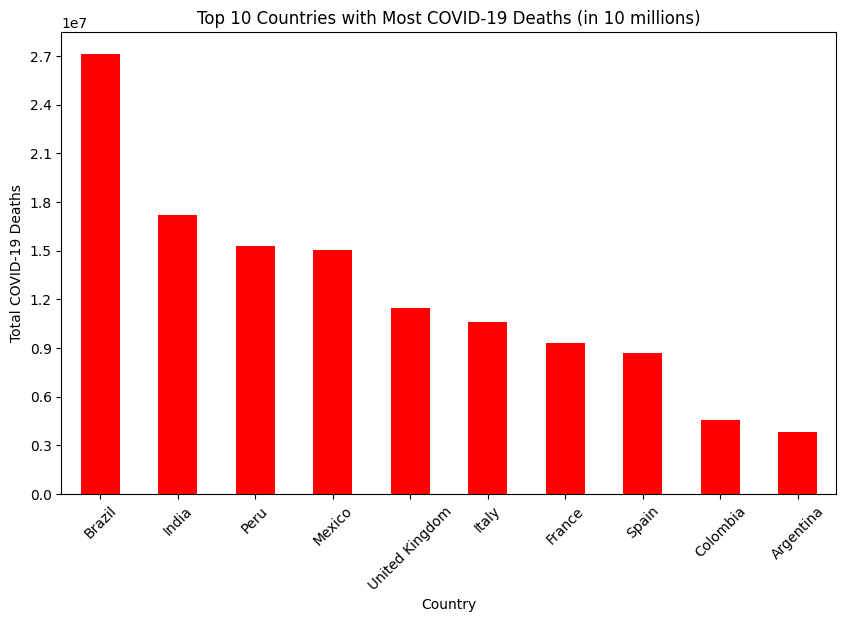

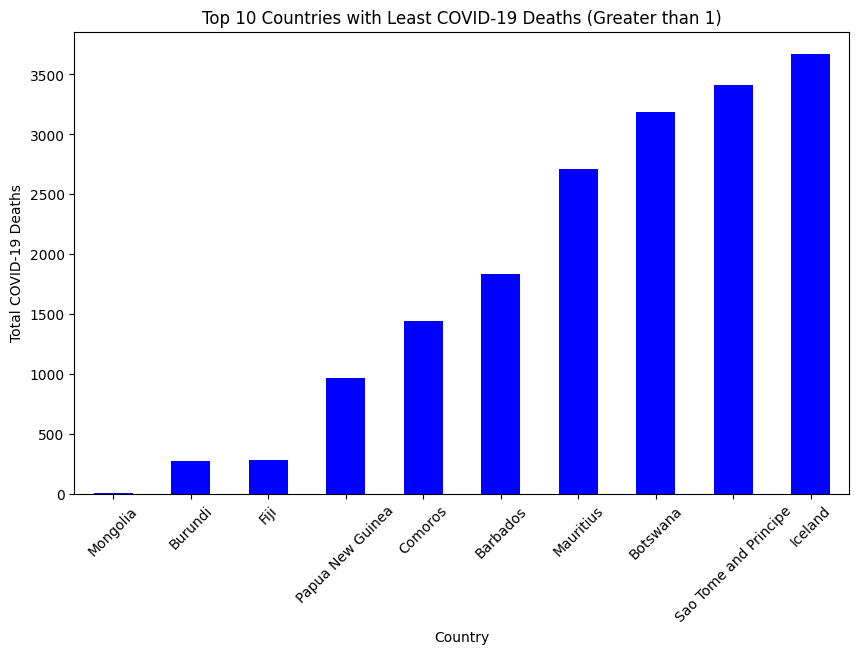

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot top 10 most deaths
plt.figure(figsize=(10, 6))
most_deaths_top_10.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Most COVID-19 Deaths (in 10 millions)')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=45)

# Ensure that the y-axis shows all digits (no formatting)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Plot top 10 least deaths (greater than 1)
plt.figure(figsize=(10, 6))
least_deaths_top_10.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Least COVID-19 Deaths (Greater than 1)')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate the average GDP per capita
average_gdp = df['GDP_per_Capita'].mean()
print("Average GDP per capita:", average_gdp)

Average GDP per capita: 14110.900084470139


In [ ]:
# Calculate correlation between GDP and COVID deaths
gdp_deaths = df.groupby('Country').agg(
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean'),
    Total_Deaths=('Deaths', 'sum')
).reset_index()
gdp_deaths_corr = gdp_deaths[['Average_GDP_Per_Capita', 'Total_Deaths']].corr().iloc[0, 1]
print("Correlation between GDP and COVID deaths:", gdp_deaths_corr)

Correlation between GDP and COVID deaths: 0.0482034182960455


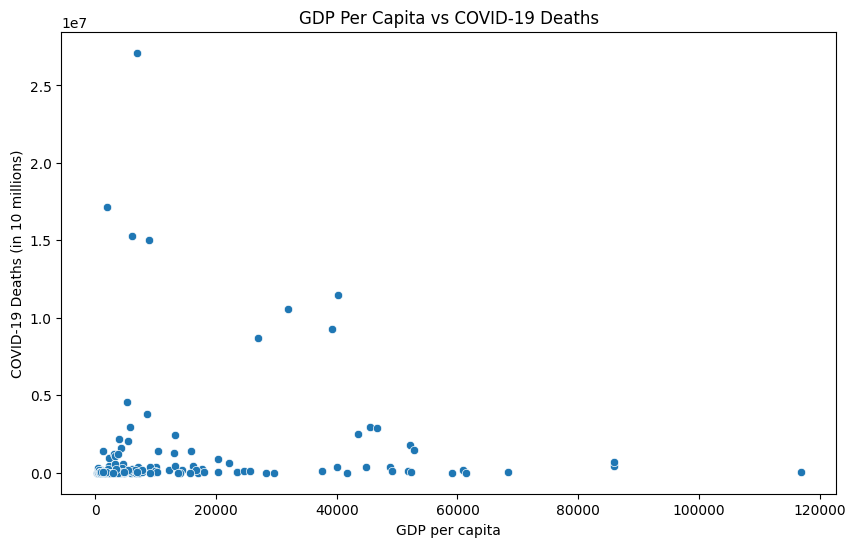

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot showing the relationship between GDP per capita and COVID deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_deaths, x='Average_GDP_Per_Capita', y='Total_Deaths')
plt.title('GDP Per Capita vs COVID-19 Deaths')
plt.xlabel('GDP per capita')
plt.ylabel('COVID-19 Deaths (in 10 millions)')  # Adjust the label to show the actual count
plt.show()


<ipython-input-52-252a660a3a44>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_deaths = gdp_deaths.groupby('GDP_Category')['Total_Deaths'].sum().reset_index()
<ipython-input-52-252a660a3a44>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')


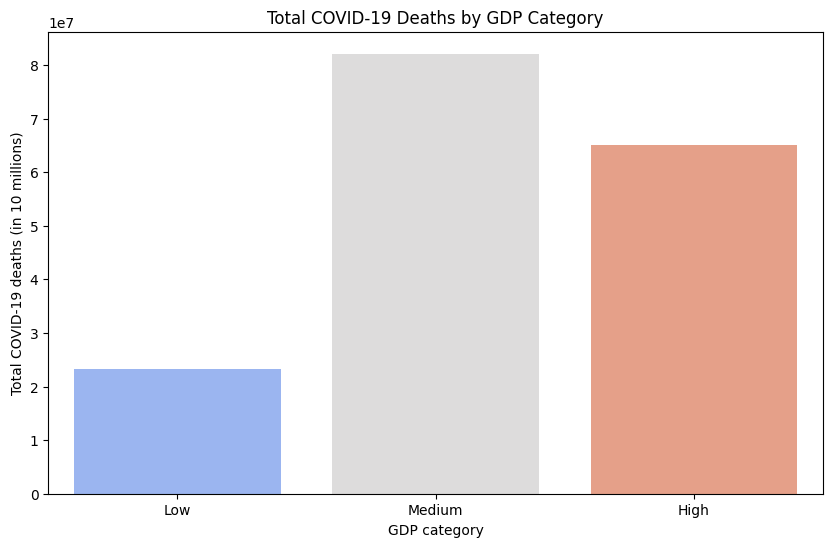

In [ ]:

# Categorize GDP per capita into Low, Medium, and High
gdp_deaths['GDP_Category'] = pd.qcut(gdp_deaths['Average_GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])

# Calculate total deaths per GDP category
total_deaths = gdp_deaths.groupby('GDP_Category')['Total_Deaths'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_deaths, x='GDP_Category', y='Total_Deaths', palette='coolwarm')
plt.title('Total COVID-19 Deaths by GDP Category')
plt.xlabel('GDP category')
plt.ylabel('Total COVID-19 deaths (in 10 millions)')
plt.show()



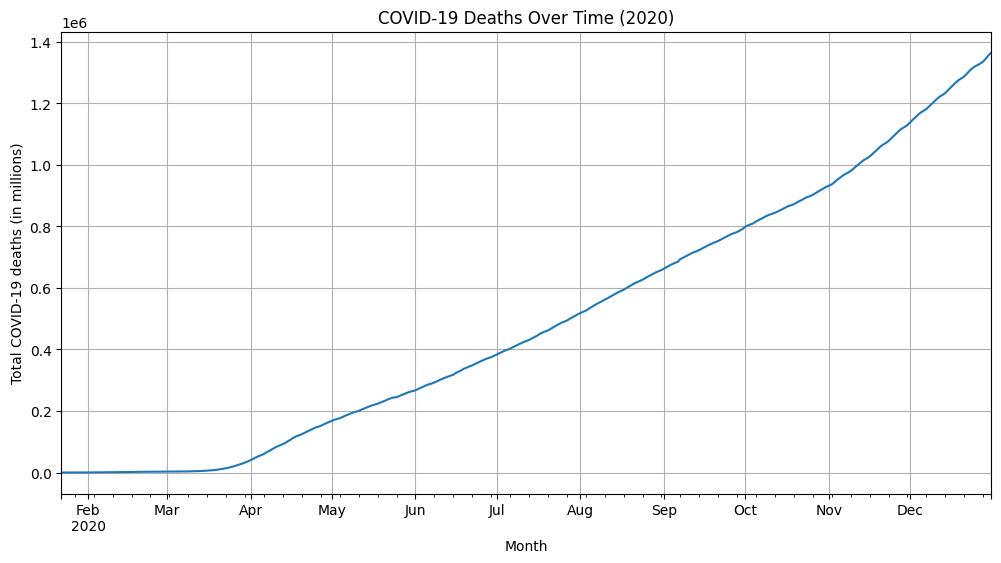

In [ ]:
deaths_over_time = df.groupby('Date')['Deaths'].sum()

# Plot COVID deaths over time
plt.figure(figsize=(12, 6))
deaths_over_time.plot()
plt.title('COVID-19 Deaths Over Time (2020)')
plt.xlabel('Month')
plt.ylabel('Total COVID-19 deaths (in millions)')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average democracy score
average_democracy = df['Democracy_Scores'].mean()
print("Average democracy score:", average_democracy)

Average democracy score: 0.5585950512978654


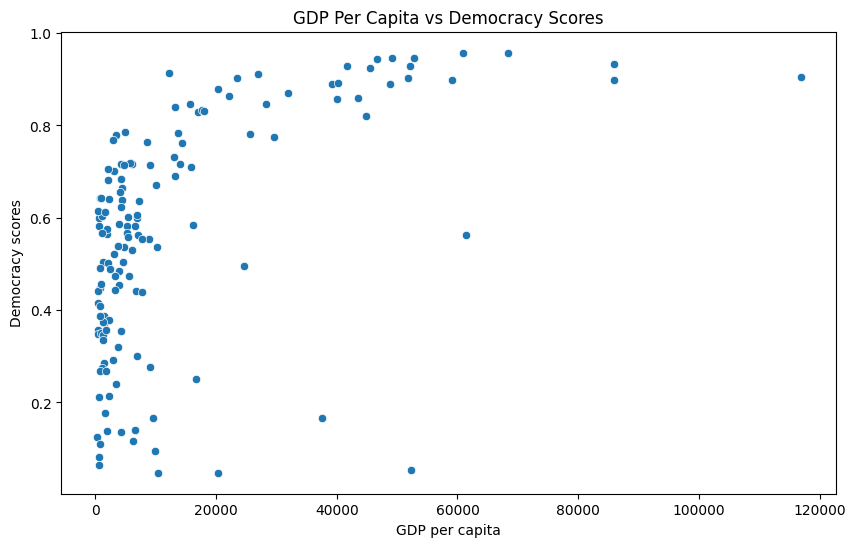

Correlation between GDP and Democracy Scores: 0.5295963097236328


In [ ]:

# GDP per capita vs Democracy Scores
# Group by country
gdp_dem = df.groupby('Country').agg(
    Average_Democracy_Scores=('Democracy_Scores', 'mean'),
    Average_GDP_Per_Capita=('GDP_per_Capita', 'mean')
).reset_index()
# print(df2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_dem, x='Average_GDP_Per_Capita', y='Average_Democracy_Scores')
plt.title('GDP Per Capita vs Democracy Scores')
plt.xlabel('GDP per capita')
plt.ylabel('Democracy scores')
plt.show()

# Find correlation
gdp_dem_corr = df2[['Average_GDP_Per_Capita', 'Average_Democracy_Scores']].corr().iloc[0, 1]
print("Correlation between GDP and Democracy Scores:", gdp_dem_corr)




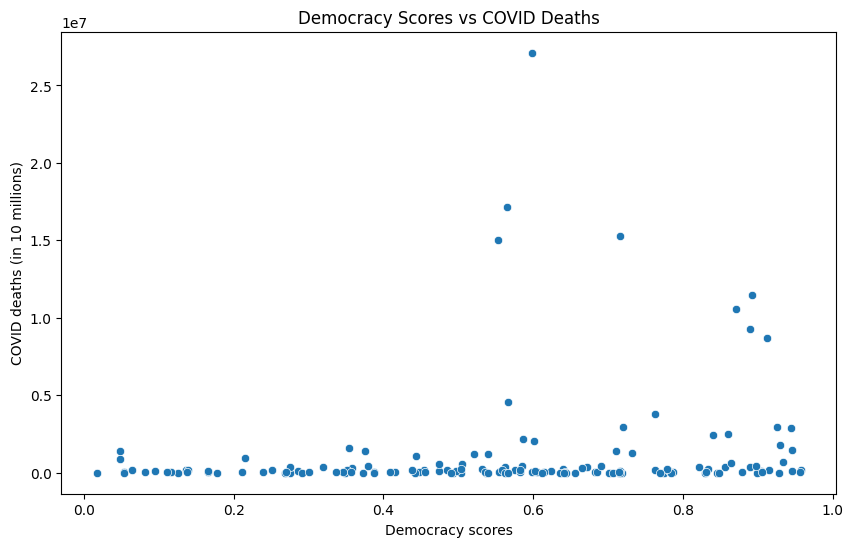

In [ ]:
# Scatter plot for Democracy scores and COVID deaths
dem_deaths = df.groupby('Country').agg(
    Democracy_Scores=('Democracy_Scores', 'mean'),
    Total_Deaths=('Deaths', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dem_deaths, x='Democracy_Scores', y='Total_Deaths')
plt.title('Democracy Scores vs COVID Deaths')
plt.xlabel('Democracy scores')
plt.ylabel('COVID deaths (in 10 millions)')
plt.show()


<ipython-input-73-487f7c823b65>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
<ipython-input-73-487f7c823b65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')


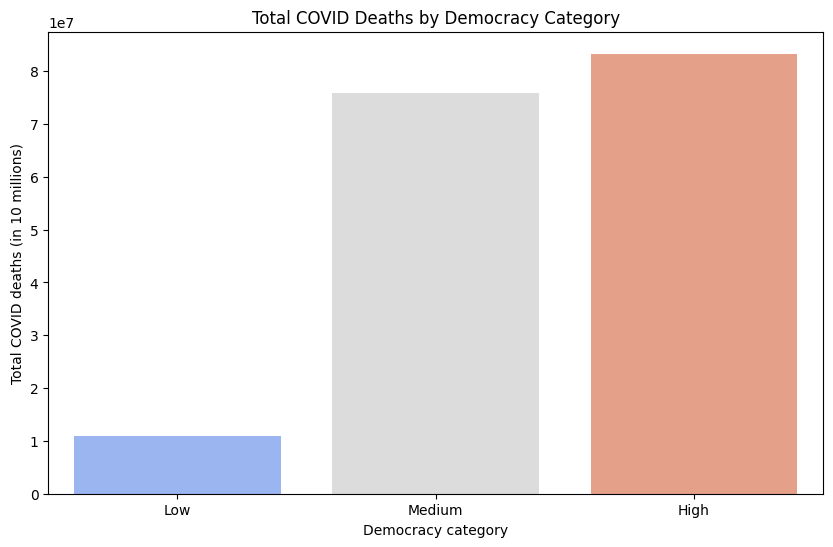

In [ ]:

# Categorize Democracy Scores into Low, Medium, and High
dem_deaths['Democracy_Category'] = pd.qcut(dem_deaths['Democracy_Scores'], q=3, labels=['Low', 'Medium', 'High'])

# Group by Democracy Category to calculate total deaths
grouped_dem_deaths = dem_deaths.groupby('Democracy_Category').agg(
    Total_Deaths=('Total_Deaths', 'sum'),
).reset_index()

# Create the bar plot for Total COVID Deaths by Democracy Category
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_dem_deaths, x='Democracy_Category', y='Total_Deaths', palette='coolwarm')
plt.title('Total COVID Deaths by Democracy Category')
plt.xlabel('Democracy category')
plt.ylabel('Total COVID deaths (in 10 millions)')
plt.show()





In [ ]:
# answering the last question with a new dataset

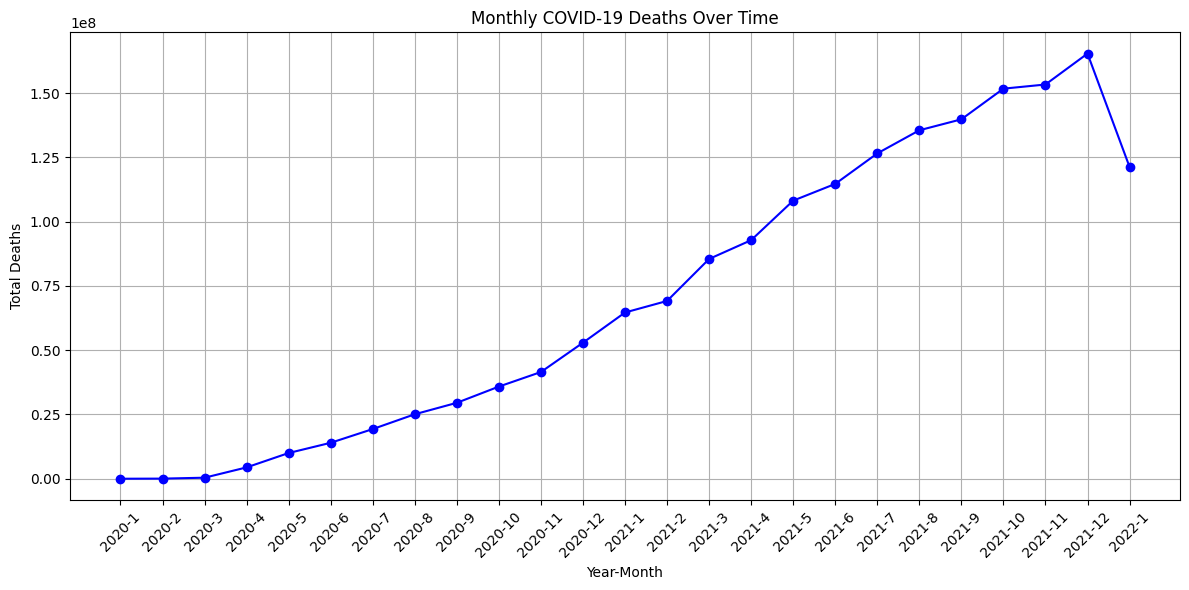

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset and convert 'Date' column to datetime format if not done already
df_covid = pd.read_csv('/content/cleaned_covid_data.csv')
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

# Step 2: Extract Year and Month from the Date
df_covid['Year'] = df_covid['Date'].dt.year
df_covid['Month'] = df_covid['Date'].dt.month

# Step 3: Group by Year and Month to get monthly deaths
monthly_deaths = df_covid.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()

# Create a new column 'YearMonth' to help with plotting
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['Deaths'], marker='o', linestyle='-', color='blue')
plt.title('Monthly COVID-19 Deaths Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


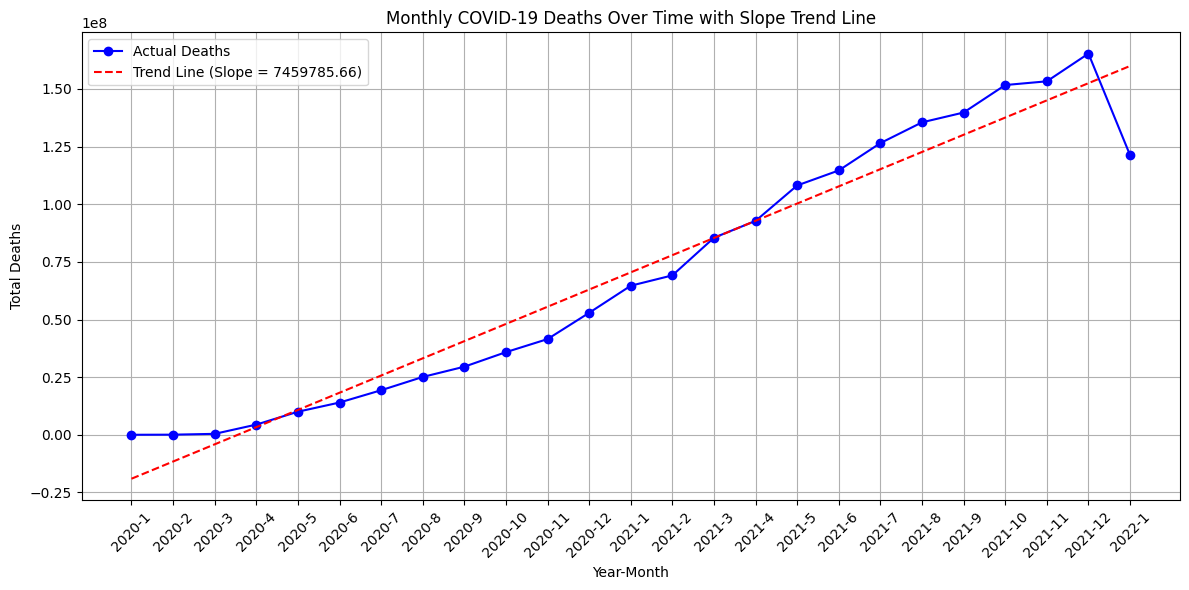

The slope of the trend line is: 7459785.66 deaths per month


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
df_covid = pd.read_csv('/content/cleaned_covid_data.csv')
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

# Step 2: Extract Year and Month
df_covid['Year'] = df_covid['Date'].dt.year
df_covid['Month'] = df_covid['Date'].dt.month

# Step 3: Group by Year and Month and aggregate deaths
monthly_deaths = df_covid.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()
monthly_deaths['YearMonth'] = monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str)

# Step 4: Calculate the time index for fitting the slope
monthly_deaths['Time_Index'] = np.arange(len(monthly_deaths))

# Step 5: Fit a linear model and get the slope using numpy's polyfit
slope, intercept = np.polyfit(monthly_deaths['Time_Index'], monthly_deaths['Deaths'], 1)

# Step 6: Plot the data and the trend line
plt.figure(figsize=(12, 6))

# Plot the actual deaths
plt.plot(monthly_deaths['YearMonth'], monthly_deaths['Deaths'], label='Actual Deaths', color='blue', marker='o')

# Plot the trend line using the slope
plt.plot(monthly_deaths['YearMonth'], intercept + slope * monthly_deaths['Time_Index'], label=f'Trend Line (Slope = {slope:.2f})', color='red', linestyle='--')

# Adding labels and title
plt.title('Monthly COVID-19 Deaths Over Time with Slope Trend Line')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Display the slope
print(f"The slope of the trend line is: {slope:.2f} deaths per month")
